In [1]:
import pandas as pd
import numpy as np
import sklearn
import sys
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.pipeline import Pipeline
from joblib import dump, load

In [2]:
sys.path.append('src/')

import plot as p
import utils as u
import evaluate as evl

In [3]:
# Load data 
df = pd.read_csv('training_data/kc_house_data.csv') 

In [4]:
# dropping duplicate rows keeping latest ones
df.sort_values(['id', 'price']).drop_duplicates(subset = 'id', keep = 'last', inplace = True)

## Train Model

In [55]:
# get feature and target dataframes
feat_df = df[df.loc[ :,df.columns != 'price'].columns]
target_df = df['price']

# get train_test_split dfs
feat_train, feat_test, target_train, target_test = u.get_train_test_split(
                                                            feat_df,
                                                            target_df,
                                                            random_state = 1
                                                  )


# fit best model pipeline on training data and predict on test
gb_grid = GradientBoostingRegressor(max_depth=4, max_features=3, min_samples_split=140, n_estimators=60,
                                    min_samples_leaf= 50, random_state=1)
model_pipeline = u.create_model_pipeline(gb_grid)

model = model_pipeline.fit(feat_train, target_train)
pred = model_pipeline.predict(feat_test)

# get evaluation metrics on test data
final_metrics = evl.get_scoring_metrics(
                        model,
                        feat_test,
                        target_test,
                        pred
)

final_metrics

{'mse': 190253.2678231053, 'mae': 99872.85851648125, 'r2': 0.7902890945900597}

In [56]:
# get evaluation metrics on train data
pred_train = model_pipeline.predict(feat_train)
final_metrics_train = evl.get_scoring_metrics(
                        model,
                        feat_train,
                        target_train,
                        pred_train
)

final_metrics_train

{'mse': 144285.25718112924, 'mae': 84212.45360770407, 'r2': 0.8338455465458969}

## Feature Importances

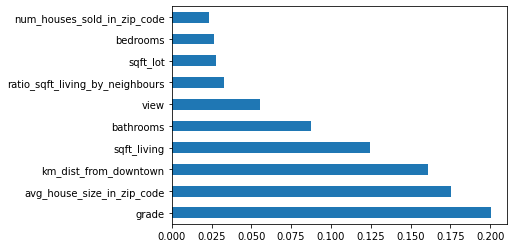

In [57]:
transformed_df = model.regressor_.named_steps['preprocess'].transform(feat_test)
p.generate_feature_importances_plot(model.regressor_.named_steps['model'], transformed_df)

In [58]:
# save the fitted model
filename = 'trained_models/House_price_prediction_model.joblib'

dump(model, filename) 

['trained_models/House_price_prediction_model.joblib']

In [59]:
# Load new data
new_df = pd.read_csv('testing_data/test.csv') 

# load model and get predictions
loaded_model = load(filename)
pred = loaded_model.predict(new_df)

np.round(pred, 2)

array([ 256582.87, 1413923.09])

## To try in next iterations ----

- <font color='green'> Attempt at `gathering more descriptive data` about the houses. For eg: house type,
  backyard, crime rate,<br> property tax, distance from school & parks.</font>  
  
- <font color='green'> Run trials with more `feature engineering`, especially on less descriptive features
  like grade, condition etc. </font>  
  
- <font color='green'> Investigate deeper the `impact of features with outliers`. </font>  
  
- <font color='green'>Experiment with `hyperparameter tuning` for simpler models. Also, try other boosting models. </font>  